<a href="https://colab.research.google.com/github/KeertanPatro/Unsupervised/blob/main/Netflix_Movies_and_TV_shows_clustering_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Konapala Sai Keertan Patro


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS

# text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
plt.style.use('ggplot')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix_clustering_unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [6]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df[df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

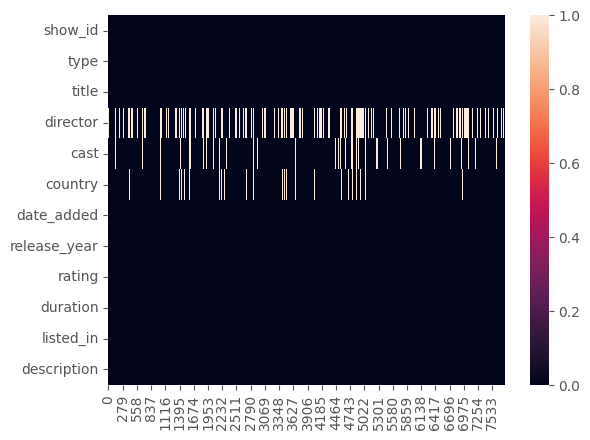

In [11]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

*  There are 7787 observations and 12 columns.  
* There are some missing values found in column director,cast and country.  
* There are no duplicate values present in thid dataset.  
* The datatype of the most features are object.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include='object')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

### Variables Description

**Show_id:** unique id foe each movie.  
**type:**    identifier(movie/TV show).   
**Title:**   Title of the movie/show.   
**director:**  Director of the show.   
**cast:**  actors involved.      
**country:**  Country of the  production.  
**date_added:** date it was added on netflix.   
**Year_release:**  Actual release year of the show.  
**ratings:**  TV ratings of the show.  
**duration:** Total duration in minutes or number of seasons.  
**listed_in:** Genre of the Movie/Show.   
Description: A brief description of the movie/show.  

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# converting date_added column to date datatype
df['date_added']=pd.to_datetime(df['date_added'])


In [16]:
# adding month and year feature to our data
df['month_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year.convert_dtypes()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  month_added   7777 non-null   object        
 13  year_added    7777 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(11)
memory usage: 859.4+ KB


In [18]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description month_added  year_added  
0  In a future where the elite inhabit an island ...      August        2020  
1  After a devastating earthquake hits Mexico Cit...    December        2016  
2  When an army recruit is found dead, his fellow...    December        2018  
3  In a postapocalyptic world, rag-doll robots hi...    November        2017  
4  A brilliant group of students become card-coun...     January        2020

### What all manipulations have you done and insights you found?

I have changed date_added column into datetime format and extracted month and year from the feature.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Exploring motion picture categories.

In [19]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

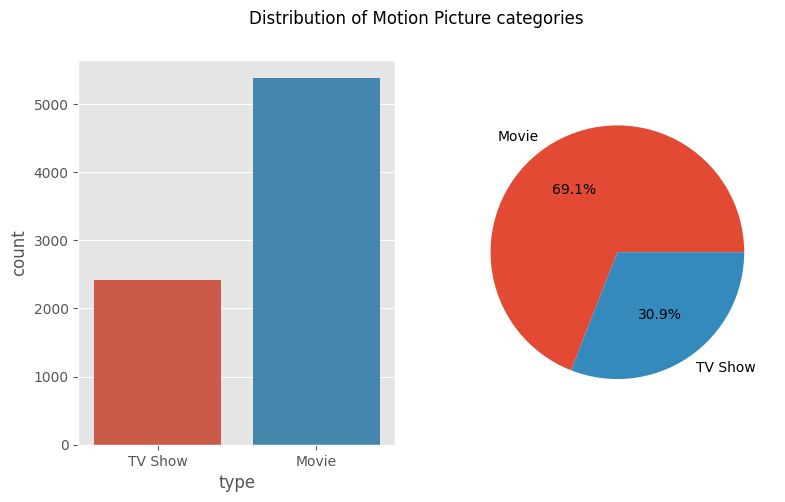

In [20]:
# different types of items
fig,ax=plt.subplots(1,2,figsize=(9,5))
sns.countplot(x='type',data=df,ax=ax[0])
ax[1].pie(df['type'].value_counts(),labels=['Movie','TV Show'],autopct='%.1f%%')
fig.suptitle('Distribution of Motion Picture categories')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that more movies than TV shows in our dataset, around 69% of the items are movies while 31% items are TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top Directors

In [367]:
tv_directors=df[df['type']=='TV Show']['director'].str.split(', ').explode().value_counts(ascending=False)
movie_directors=df[df['type']=='Movie']['director'].str.split(', ').explode().value_counts(ascending=False)

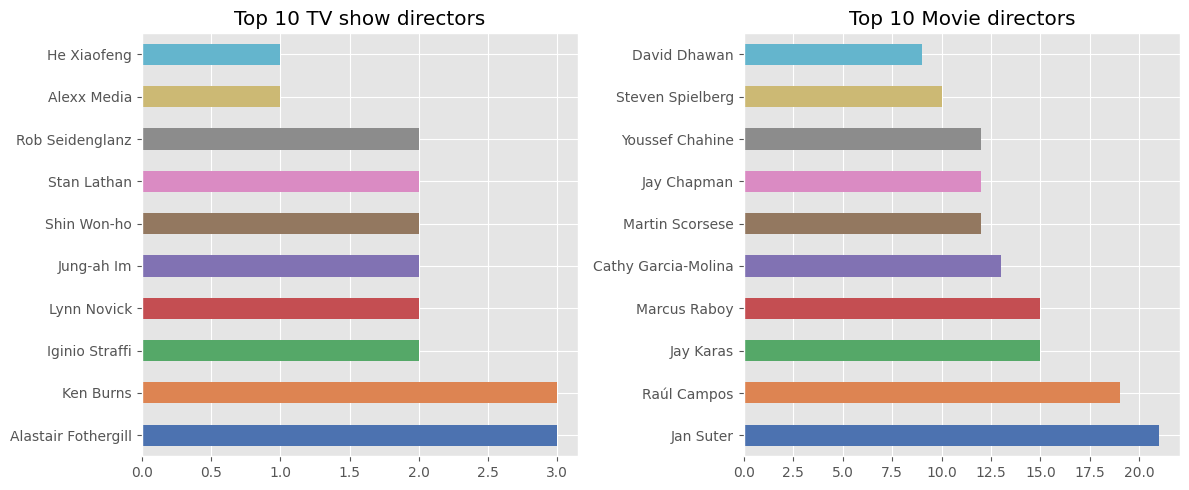

In [368]:
# visualizing top 10 directors
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_directors[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show directors")
movie_directors[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie directors")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top 10 directors of both movies and TV show

##### 2. What is/are the insight(s) found from the chart?

*  The top TV show directors in netflix are Alastair Fothergill, Ken Burns having directed 3 and 2 netflix TV shows .  

*  The top directors in the netflix who have directed movies are Jan Suter, Raul Campos having directed 21 and 19 movies respectively.  

#### Top Casts

In [23]:
# Chart - 3 visualization code
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [24]:
# separating tv cast names
tv_cast_names=df[df['type']=='TV Show']['cast'].str.split(', ').explode().value_counts()

# separating movie cast names
movie_cast_names=df[df['type']=='Movie']['cast'].str.split(', ').explode().value_counts()


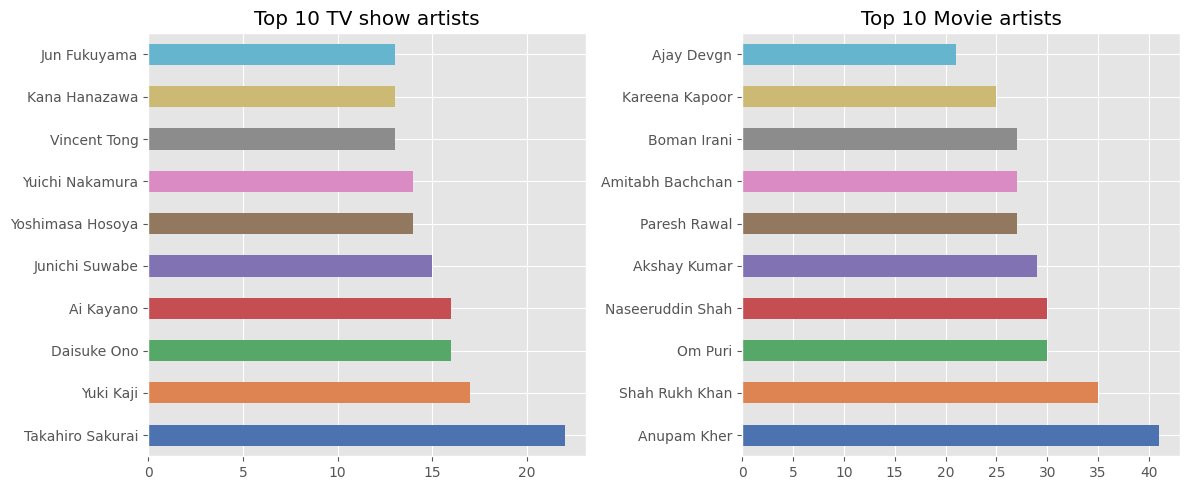

In [349]:
# Visualizing top casts
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_cast_names[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show artists")
movie_cast_names[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie artists")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top artists in both tv as well as movies featuring in Netflix.

##### 2. What is/are the insight(s) found from the chart?

* The top artists featuring in Netflix TV shows are **Takahiro Sakurai** and **Yuki Kaji** featuring 23 and 17 shows respectively.  

* The top artists featuring in Netflix movies are **Anupam Kher** and Shah Rukh Khan featuring 40 and 35 movies respectively.  

#### Distribution of Pictures based on country

In [26]:
country_counts=df['country'].str.split(", ").explode()
country_counts=country_counts.value_counts()
country_counts.rename(index={'United States':'United States of America'},inplace=True)

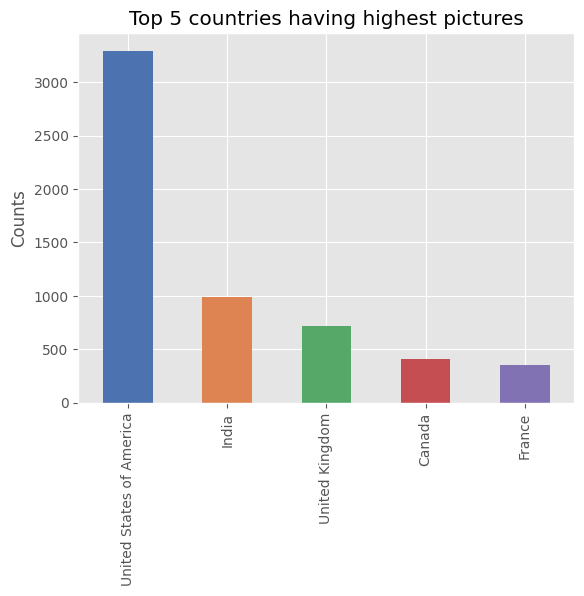

In [350]:
# top 5 countries
country_counts[:5].plot(kind='bar',color=color)
plt.title("Top 5 countries having highest pictures")
plt.ylabel('Counts')
plt.show()

<ipython-input-28-0dda1c10eac0>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


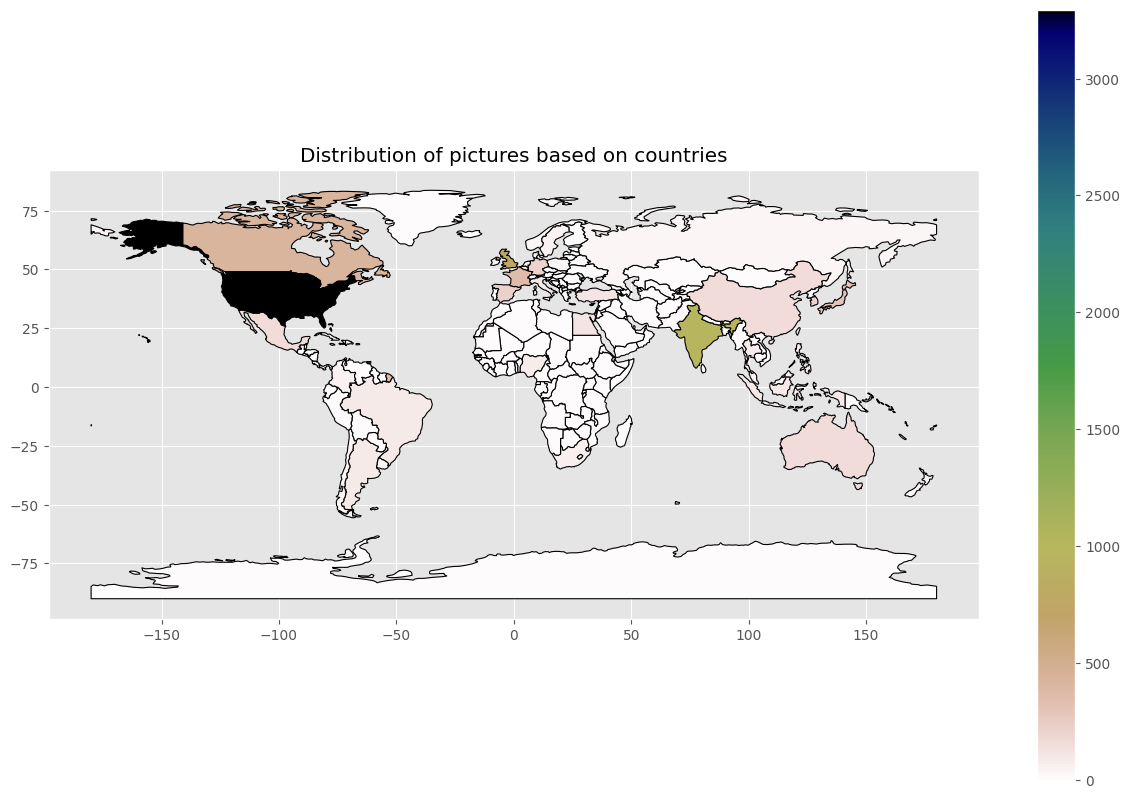

In [28]:
# Visualizing the distribution using world map
worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data=pd.merge(worldmap,country_counts,left_on='name',right_index=True,how='left')
merged_data.rename(columns={'country':'counts'},inplace=True)
merged_data['counts']=merged_data['counts'].fillna(0)

# plotting
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='counts', linewidth=0.8,edgecolor='black',ax=ax,legend=True,cmap='gist_earth_r')
plt.title('Distribution of pictures based on countries')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to visualize distribution of movies/tv shows across various countries.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies or Tv shows are american, there are few Indian pictures followed by England, Canada and France.

Answer Here

#### Analyzing Titles of the Picture

In [29]:
df['title'].tail()

7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, dtype: object

In [30]:
text=' '.join(title for title in df['title'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

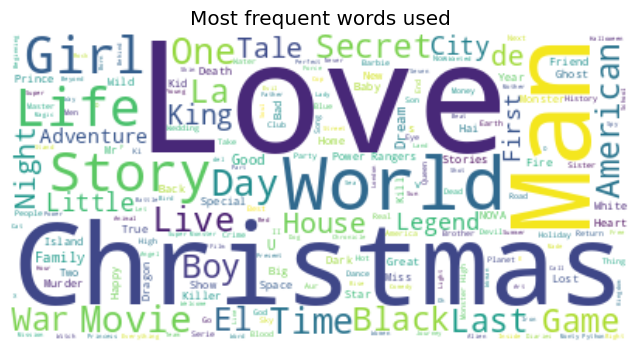

In [31]:
# visualizing most frequent words
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the frequent words used in the Movie/TV Show title for this dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that the most frequent words used in the dataset are **Love, World, Christmas, Man** etc. So we can expect that movies are based on Love, Christmas and so on.

#### Release year of the Picture

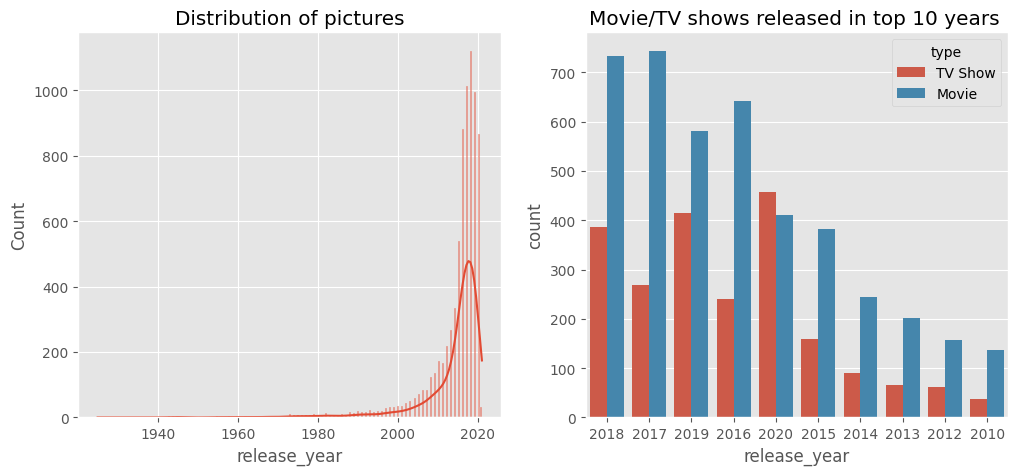

In [33]:
# Distribution of pictures based on release year
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['release_year'],kde=True,ax=ax[0])
ax[0].set_title("Distribution of pictures")
sns.countplot(x='release_year',hue='type',order=df['release_year'].value_counts()[:10].index,data=df,ax=ax[1])
ax[1].set_title("Movie/TV shows released in top 10 years ")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into distribution of Netflix movies and TV shows based on year.

##### 2. What is/are the insight(s) found from the chart?

We find that this Netflix primarily contains movies which are released in the year **2018, 2017, 2019, 2016, 2020**. There are very few old movies.

###**Ratings**

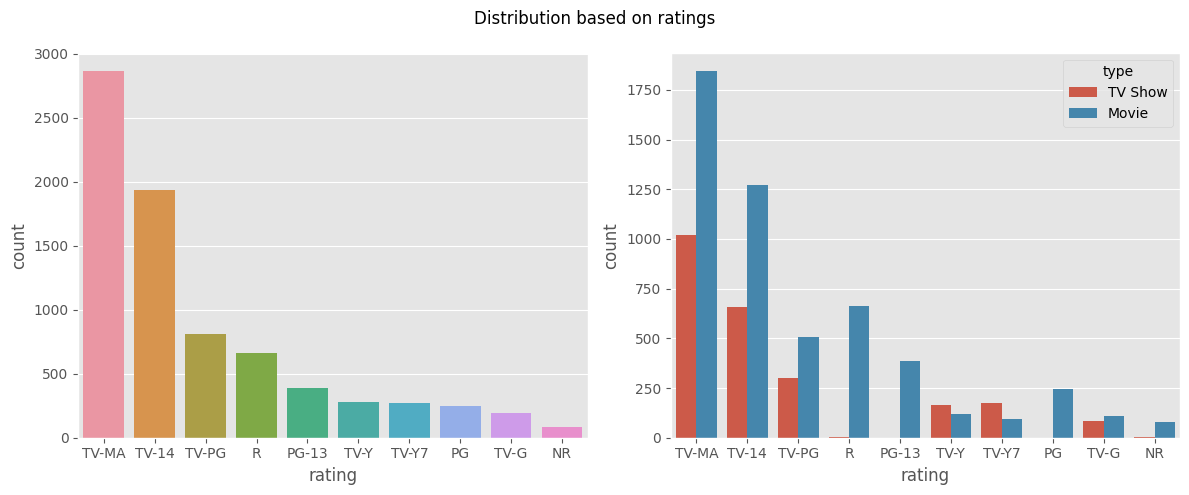

In [34]:
# Distribution based on ratings

fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='rating',data=df,ax=ax[0],order=df['rating'].value_counts().index[:10])
sns.countplot(x='rating',hue='type',order=df['rating'].value_counts().index[:10],data=df,ax=ax[1])
fig.suptitle("Distribution based on ratings")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the rating distribution to our movies/tv shows in Netflix to understand for which audience this dataset belongs to.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see that most of the pictures have ratings like **TV-MA, TV-14, TV-PG, which suggest that these shows are for mature audience**, and very few picture are meant for the kids.

#### **Movies/ TV show based on Generes.**

In [35]:
mov_genres=df.loc[df['type']=='Movie']['listed_in'].str.split(", ").explode()

tv_genres=df.loc[df['type']=='TV Show']['listed_in'].str.split(", ").explode()
tv_genres

0             International TV Shows
0                          TV Dramas
0                TV Sci-Fi & Fantasy
5             International TV Shows
5                          TV Dramas
                    ...             
7779          International TV Shows
7779       Spanish-Language TV Shows
7779    Stand-Up Comedy & Talk Shows
7785          International TV Shows
7785                      Reality TV
Name: listed_in, Length: 5525, dtype: object

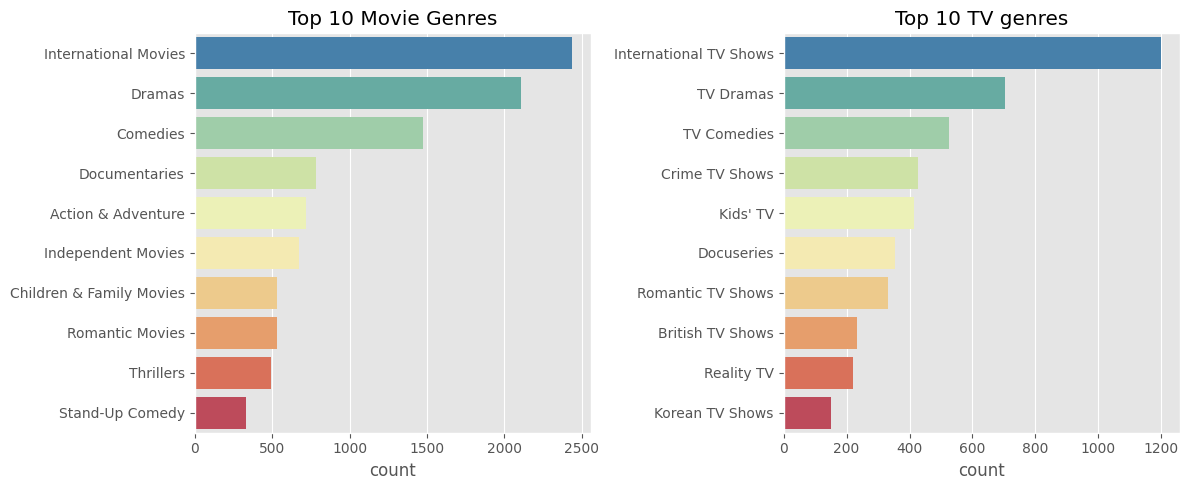

In [36]:
# visualizing top genres for movie and tv shows
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(y=mov_genres,order=mov_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[0])
ax[0].set_title("Top 10 Movie Genres")
ax[0].set_ylabel("")
sns.countplot(y=tv_genres,order=tv_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[1])
ax[1].set_title("Top 10 TV genres")
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the top genres for Movies and TV shows that people prefer.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we find that people in genral like **international movies and shows followed by drama and comedy.**

#### **Analyzing description of Movies and Tv shows**

In [37]:
text=' '.join(words for words in df['description'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

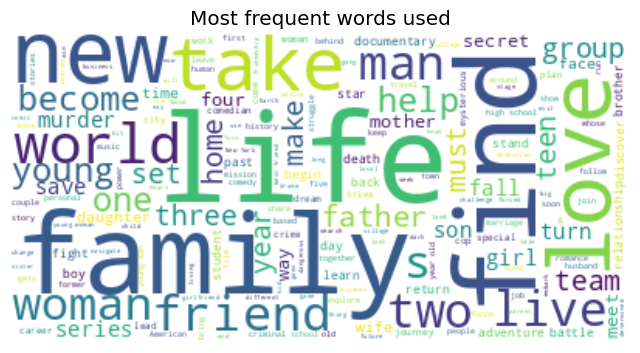

In [38]:
# visualizing most frequent words

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the most frequent used in the decription of a movie or tv show.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words are **family, friend, life, love, world**  etc. This suggests that plot of the majority movie or tv show might revolve around family, friend, life, love, world.

## ***5. Feature Engineering & Data Pre-processing***

In [48]:
# creating copy
netflix_df=df.copy()

### 1. Handling Missing Values

In [49]:
# Handling Missing Values & Missing Value Imputation
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

We see lot of missing values in column director, cast, country.

In [50]:
# handling missing values in director, cast, country
netflix_df[['director','cast','country']]=netflix_df[['director','cast','country']].fillna('')

# dropping missing values in date_added release_year
netflix_df=netflix_df.dropna(subset=['date_added','rating'])

In [51]:
netflix_df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [52]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have replaced the missing value in director, cast, country as unknown and we have dropped the missing values in date_added and ratings.

### 2. Handling Outliers

In [53]:
# let us look at our numerical columns
num_col=df.describe().columns
num_col


Index(['release_year', 'year_added'], dtype='object')

In [54]:
df['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7787, dtype: Int64

Text(0.5, 0.98, 'Outliers in numeric columns')

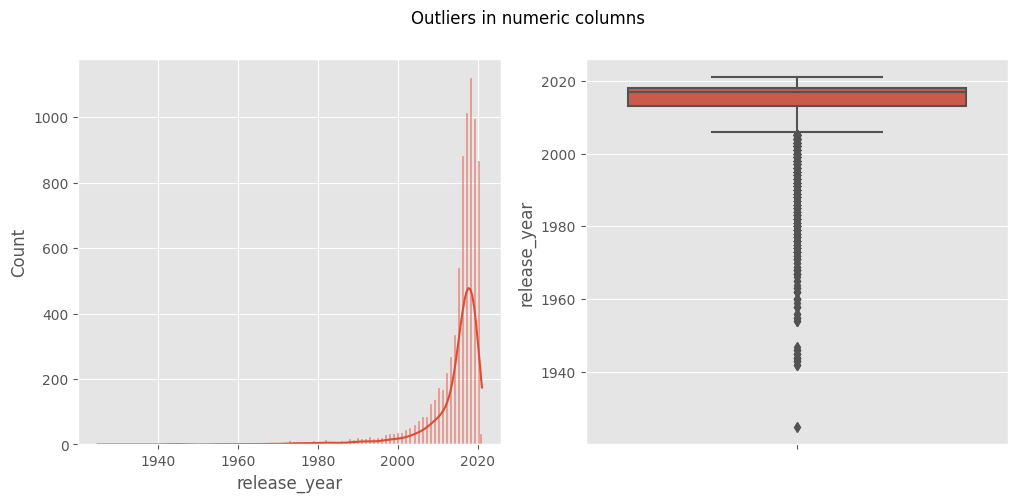

In [55]:
# plotting these two numeric variables
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["release_year"],kde=True,ax=ax[0])
sns.boxplot(y=df['release_year'],ax=ax[1])
fig.suptitle("Outliers in numeric columns")


##### What all outlier treatment techniques have you used and why did you use those techniques?

Since there are only two numeric columns, rest are text data, and we won't need the numeric data for our clustering analysis, so we let the outliers be as it is.

### 3. Categorical Encoding

In [56]:
# Encode your categorical columns
ratings = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
netflix_df['rating']=netflix_df['rating'].map(ratings)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have decoded the ratings into very simple classification so that it would be easy to segment the movies and tv shows.

### 4. **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [57]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

In [59]:
netflix_df['director'].head()

0                     
1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
Name: director, dtype: object

In [60]:
# merging the sub-names of the director to form a single string

def director_merge(name):
  merge_name=[]
  for word in name.split(" "):
    merge_name.append(word)
  merge_name=''.join(merge_name)
  return merge_name

netflix_df['director']=netflix_df['director'].apply(director_merge)

In [61]:
netflix_df['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [62]:
# similary merging the individual artists name to form a single string for a unique artist

def merging_names(text):
  new_text=[]
  for name in text.split(', '):
    new_name=name.replace(" ","")
    new_text.append(new_name)
  new_text=", ".join(new_text)
  return new_text
merging_names(netflix_df['cast'][0])
netflix_df['cast']=netflix_df['cast'].apply(merging_names)
netflix_df['cast'].head()

0    JoãoMiguel, BiancaComparato, MichelGomes, Rodo...
1    DemiánBichir, HéctorBonilla, OscarSerrano, Aza...
2    TeddChan, StellaChung, HenleyHii, LawrenceKoh,...
3    ElijahWood, JohnC.Reilly, JenniferConnelly, Ch...
4    JimSturgess, KevinSpacey, KateBosworth, AaronY...
Name: cast, dtype: object

#### 1. Expand Contraction

In [64]:
# combining all the relevent text features which is necessary for clustering analysis

netflix_df['combined_text']=netflix_df['director']+' '+ netflix_df['cast']+ " "+ netflix_df['rating']+ ' ' \
                                 +netflix_df['listed_in']+ ' ' + netflix_df['description']

In [65]:
netflix_df['combined_text'][0]

' JoãoMiguel, BiancaComparato, MichelGomes, RodolfoValente, VanezaOliveira, RafaelLozano, VivianePorto, MelFronckowiak, SergioMamberti, ZezéMotta, CelsoFrateschi Adults International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Lower Casing

In [66]:
# Lower Casing
def lower_casing(text):
  text=text.lower()
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lower_casing)

#### 3. Removing Punctuations

In [67]:
# Remove Punctuations
def remove_punctuations(text):
  text=re.sub(r'[^\w\s]','',text)
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words which contain digits

In [68]:
# Remove URLs & Remove words and digits contain digits
def remove_url(text):
  text=re.sub(r'https?\S+|www\S+','',text) # removing urls
  text=re.sub(r'\w*\d+\w*','',text) # removing words which contain digits
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_url)

In [69]:
netflix_df['combined_text'][0]

' joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### 5. Removing Stopwords

In [70]:

nltk.download('stopwords')
sw=stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [71]:
# Remove Stopwords
def remove_stopwords(text):
  new_text=[words for words in text.split() if words not in sw]
  new_text=' '.join(new_text)
  return new_text
netflix_df['combined_text']= netflix_df['combined_text'].apply(remove_stopwords)
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Lemmatization

In [72]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [73]:
def lemmatizer(text):
  lemmatizer=WordNetLemmatizer()
  lemmas=[]
  for word in text.split():
    lemma=lemmatizer.lemmatize(word,pos='v')
    lemmas.append(lemma)
  new_text=' '.join(lemmas)
  return new_text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lemmatizer)


In [74]:
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv show tv dramas tv scifi fantasy future elite inhabit island paradise far crowd slum get one chance join save squalor'

The following steps we have done above for text preprocessing are:  
**Step-1:** We combine all the relevent text features in the dataset into new feature called **combined_text**.    
**Step-2:** We convert all the upper cases in combined_text to lower case.  
**Step-3:** We remove all punctuations present in combined_text.  
**Step-4:** We remove all URL's and words which contain digits.  
**Step-5:** We remove all the Stopwords in the combined_text.  
**Step-6:** We do Lemmatization on combined_text this converts all the synonyms of a word into one root word.

#### 7. Tokenization

In [75]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [76]:
tokenized_data=netflix_df['combined_text'].copy()

In [77]:
# Tokenization
tokenized_data=tokenized_data.apply(word_tokenize)
tokenized_data[45]

['alicanyücesoy',
 'melisasözen',
 'musauzunlar',
 'serkanercan',
 'özkanuğur',
 'ülküduru',
 'tansubiçer',
 'nadirsarıbacak',
 'sermetyeşil',
 'ayhankavas',
 'adults',
 'crime',
 'tv',
 'show',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'orphan',
 'subject',
 'test',
 'give',
 'superpowers',
 'rescue',
 'raise',
 'istanbuls',
 'streets',
 'fall',
 'reporter',
 'link',
 'past']

In [78]:
tokenized_data[0]

['joãomiguel',
 'biancacomparato',
 'michelgomes',
 'rodolfovalente',
 'vanezaoliveira',
 'rafaellozano',
 'vivianeporto',
 'melfronckowiak',
 'sergiomamberti',
 'zezémotta',
 'celsofrateschi',
 'adults',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowd',
 'slum',
 'get',
 'one',
 'chance',
 'join',
 'save',
 'squalor']

#### 8. Text Vectorization

In [79]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False,max_features=10000)
X = vectorizer.fit_transform(netflix_df['combined_text'])

In [80]:
X=X.toarray()

In [81]:
vectorizer.get_feature_names_out()[:30]

array(['aakashdabhade', 'aamirbashir', 'aamirkhan', 'aaron',
       'aaronabrams', 'aaronburns', 'aarondouglas', 'aaroneckhart',
       'aaronjeffery', 'aaronpaul', 'aarontaylorjohnson', 'aaronyan',
       'aaronyoo', 'aashishchaudhary', 'aasifmandvi', 'abandon',
       'abbasalibhaiburmawallamastanalibhaiburmawalla', 'abbey',
       'abbiecornish', 'abbydonnelly', 'abbytrott', 'abdalahmishrif',
       'abdelaziznmila', 'abdelilahwahbi', 'abduct', 'abduction',
       'abhaydeol', 'abhimanyusingh', 'abhishekbachchan',
       'abigailbreslin'], dtype=object)

##### Which text vectorization technique have you used and why?

Here we have used TF-IDF vectorization technique, it is the best technique as it gives more importance to less frequent words, and less importance to high frequent words.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimension reduction is needed as there are more than 20000 features and when we do clustering analysis of this many dimensions our program would crash.

In [86]:
from sklearn.decomposition import PCA

In [87]:
# DImensionality Reduction (If needed)

pca=PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)


[1.47507829e-02 6.26262828e-03 5.68458535e-03 ... 7.45164887e-35
 6.87506576e-35 6.43302622e-35]


In [88]:
netflix_df['rating'].head()

0    Adults
1    Adults
2    Adults
3     Teens
4     Teens
Name: rating, dtype: object

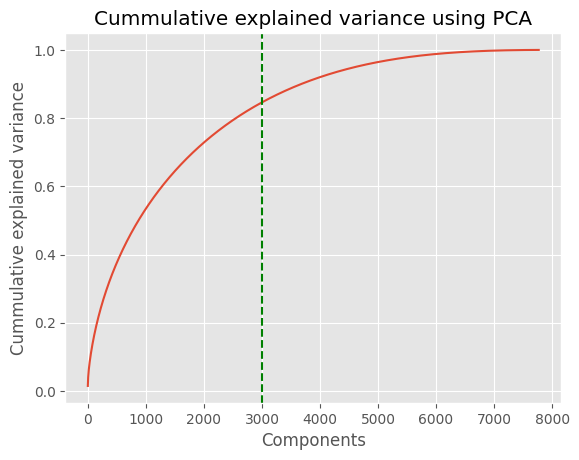

In [89]:
# plotting to see explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=3000,color='g',linestyle='--')
plt.xlabel("Components")
plt.ylabel("Cummulative explained variance")
plt.title("Cummulative explained variance using PCA")
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA to reduce the dimension of the dataset, from the above plot we find that about 3000 components could explain about 80% of the variance.

In [90]:
# using pca to reduce dimensions
pca=PCA(n_components=3000, random_state=0)
X_pca=pca.fit_transform(X)

In [91]:
netflix_df['rating'].head(3)

0    Adults
1    Adults
2    Adults
Name: rating, dtype: object

In [92]:
X_pca.shape

(7770, 3000)

## ***6. ML Model Implementation***

###**K Means**

In [96]:
from sklearn.cluster import KMeans

In [97]:

# Elbow method to determine the best value of n_clusters

sse=[]
for k in range(1,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  sse.append(kmeans.inertia_)



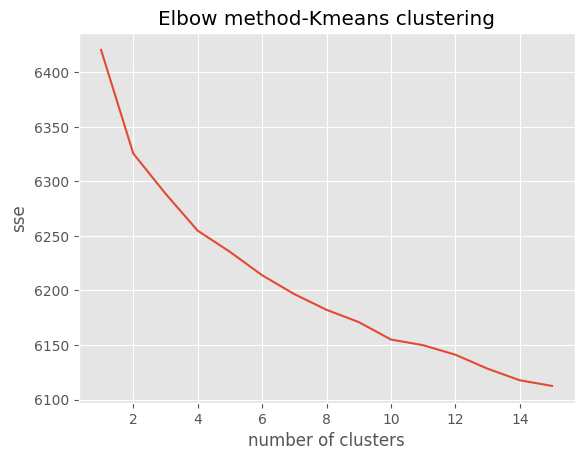

In [98]:
# plotting sse to find optimal k value
plt.plot(range(1,16),sse)
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.title("Elbow method-Kmeans clustering")
plt.show()

From the above plot we see that as number of clusters increases the sse value decreases, it is difficult to point out the elbow from the above curve. We need a better method to find out the best value of number of clusters.

In [99]:
netflix_df['rating'].head(3)

0    Adults
1    Adults
2    Adults
Name: rating, dtype: object

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
# silhoutte method to find best value of k
sil_score=[]
for k in range(2,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  label=kmeans.labels_
  sil_score.append(silhouette_score(X_pca, label))


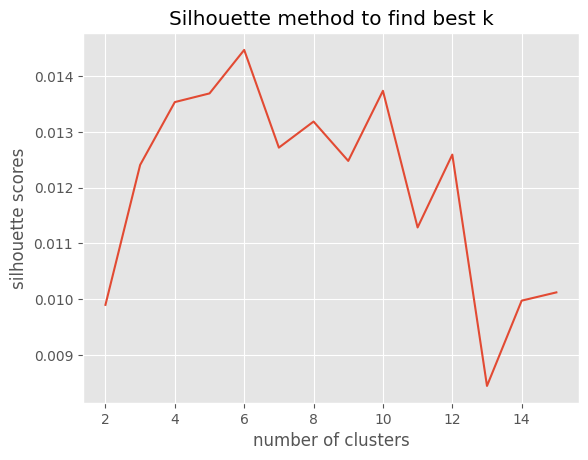

In [102]:
# plotting silhouette scores for different clusters
plt.plot(range(2,16),sil_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.title('Silhouette method to find best k')
plt.show()

The number of clusters is determined for which silhouette score is maximum, from the above plot we find that the silhouette score is maximum for k=6, hence the number of clusters which we should choose for this problem is 6.

In [103]:
# clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(X_pca)

KMeans(n_clusters=6, random_state=0)

In [104]:
# evaluation metric
kmeans_sse = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

In [105]:
print("sse for 6 clusters is:",kmeans_sse)
print("silhouette_score for 6 clusters is",kmeans_silhouette_score)

sse for 6 clusters is: 6213.976191049532
silhouette_score for 6 clusters is 0.014467557210595037


In [106]:
netflix_df['rating'].value_counts()

Adults          3617
Young Adults    1928
Older Kids      1327
Kids             512
Teens            386
Name: rating, dtype: int64

In [107]:
# labelling the dataset
kmeans.labels_
netflix_df['clustering_label']=kmeans.labels_
netflix_df.sample(5)

show_id     type                      title  \
2561   s2562    Movie                  Guzaarish   
908     s909    Movie                   Big Time   
3935   s3936  TV Show                 Marco Polo   
438     s439    Movie  Altered Carbon: Resleeved   
84       s85    Movie                  21 & Over   

                           director  \
2561            SanjayLeelaBhansali   
908            KasparAstrupSchröder   
3935                                  
438   TakeruNakajima,YoshiyukiOkada   
84              JonLucas,ScottMoore   

                                                   cast               country  \
2561  HrithikRoshan, AishwaryaRaiBachchan, ShernazPa...                 India   
908                                        BjarkeIngels               Denmark   
3935  LorenzoRichelmy, BenedictWong, ChinHan, JoanCh...         United States   
438   TatsuhisaSuzuki, RinaSatou, AyakaAsai, JoujiNa...  Japan, United States   
84    MilesTeller, SkylarAstin, JustinChon, SarahWri...         United States   

     date_added  release_year        rating   duration  \
2561 2018-08-02          2010  Young Adults    121 min   
908  2018-04-01          2017        Adults     90 min   
3935 2016-07-01          2016        Adults  2 Seasons   
438  2020-03-19          2020        Adults     75 min   
84   2019-04-16          2013        Adults     93 min   

                                              listed_in  \
2561                       Dramas, International Movies   
908                                       Documentaries   
3935                   TV Action & Adventure, TV Dramas   
438   Action & Adventure, Anime Features, Internatio...   
84                                             Comedies   

                                            description month_added  \
2561  After an onstage disaster leaves an illusionis...      August   
908   In this documentary, architect Bjarke Ingels o...       April   
3935  Set in a world of greed, betrayal, sexual intr...        July   
438   On the planet Latimer, Takeshi Kovacs must pro...       March   
84    Jeff's straight-and-narrow life changes abrupt...       April   

      year_added                                      combined_text  \
2561        2018  sanjayleelabhansali hrithikroshan aishwaryarai...   
908         2018  kasparastrupschröder bjarkeingels adults docum...   
3935        2016  lorenzorichelmy benedictwong chinhan joanchen ...   
438         2020  takerunakajimayoshiyukiokada tatsuhisasuzuki r...   
84          2019  jonlucasscottmoore milesteller skylarastin jus...   

      clustering_label  
2561                 1  
908                  4  
3935                 3  
438                  3  
84                   1

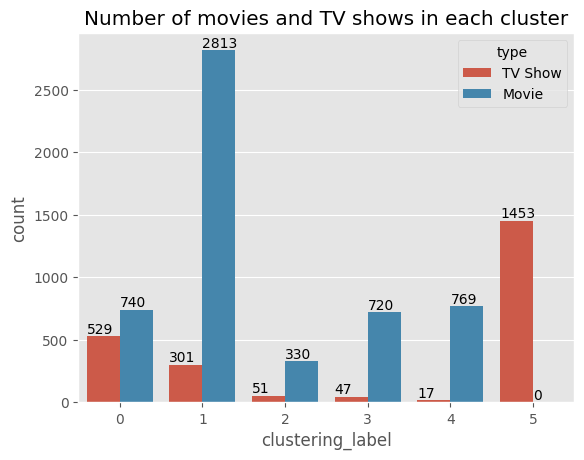

In [108]:
# visualizing cluster distribution
bars=sns.countplot(x='clustering_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 25, format(yval,'.0f'))

#### **Analyzing key content present in clusters.**

In [109]:
def kmeans_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['clustering_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


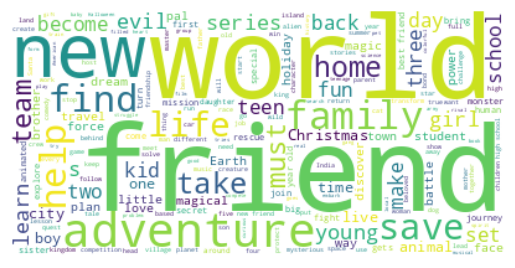

In [110]:
# key content in cluster 0
kmeans_wordcloud(0)

In [111]:
netflix_df[netflix_df['clustering_label']==0].sample(8)[['title','rating','listed_in']]

title      rating  \
527                                   ANIMA  Older Kids   
1567                           Düğün Dernek  Older Kids   
2647  Hatchimals | Adventures in Hatchtopia        Kids   
5727                            Soul Surfer  Older Kids   
3215                                  Joker  Older Kids   
266                      Aajcha Divas Majha  Older Kids   
1119   Bruno and Boots: Go Jump in the Pool  Older Kids   
5843             Street Food: Latin America  Older Kids   

                                             listed_in  
527       Dramas, Independent Movies, Music & Musicals  
1567                    Comedies, International Movies  
2647                                          Kids' TV  
5727       Dramas, Faith & Spirituality, Sports Movies  
3215  Comedies, International Movies, Music & Musicals  
266             Comedies, Dramas, International Movies  
1119                Children & Family Movies, Comedies  
5843             Docuseries, Spanish-Language TV Shows

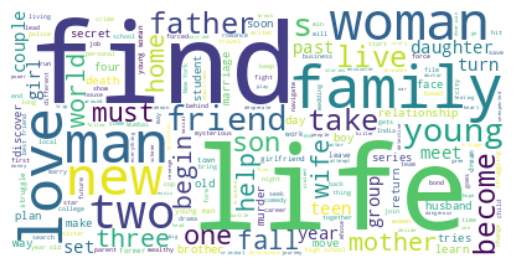

In [112]:
# key content in cluster 1
kmeans_wordcloud(1)

In [113]:
netflix_df[netflix_df['clustering_label']==1].sample(8)[['title','rating','listed_in']]

title  rating  \
7714          Yoga Hosers   Teens   
5261                 ROMA  Adults   
1612          Dark Crimes  Adults   
807         Before I Wake   Teens   
3543           Last Night  Adults   
431   Along Came a Spider  Adults   
5742              Special  Adults   
1559               Cuties  Adults   

                                             listed_in  
7714       Comedies, Horror Movies, Independent Movies  
5261  Dramas, Independent Movies, International Movies  
1612                                 Dramas, Thrillers  
807                           Horror Movies, Thrillers  
3543       Dramas, Independent Movies, Romantic Movies  
431                                          Thrillers  
5742                                       TV Comedies  
1559                      Dramas, International Movies

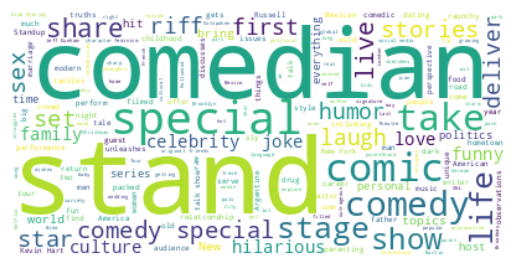

In [114]:
# key content in cluster 2
kmeans_wordcloud(2)

In [115]:
netflix_df[netflix_df['clustering_label']==2].sample(8)[['title','rating','listed_in']]

title        rating  \
916                              Bill Burr: Paper Tiger        Adults   
7091        Tim Minchin And The Heritage Orchestra Live        Adults   
5036                                   Queens vs. Kings  Young Adults   
3339  Kenny Sebastian: The Most Interesting Person i...        Adults   
5086                                Ralphie May: Unruly        Adults   
2537             Grego Rossello: Disculpe las molestias        Adults   
5035                                   Queens of Comedy        Adults   
550        Anthony Jeselnik: Fire in the Maternity Ward        Adults   

                                              listed_in  
916                                     Stand-Up Comedy  
7091                  Music & Musicals, Stand-Up Comedy  
5036          Stand-Up Comedy & Talk Shows, TV Comedies  
3339                                    Stand-Up Comedy  
5086                                    Stand-Up Comedy  
2537                                    Stand-Up Comedy  
5035  International TV Shows, Stand-Up Comedy & Talk...  
550                                     Stand-Up Comedy

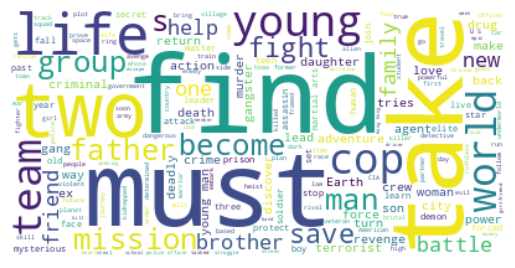

In [116]:
# key content in cluster 3
kmeans_wordcloud(3)

In [117]:
netflix_df[netflix_df['clustering_label']==3].sample(8)[['title','rating','listed_in']]

title        rating  \
4880                                 Players  Young Adults   
89                          24 Hours to Live        Adults   
2094                        Fakta Ladh Mhana  Young Adults   
1851            Dragonheart: A New Beginning    Older Kids   
2539                              Gridlocked        Adults   
6552                      The Last Boy Scout        Adults   
5790  Star Wars: Episode VIII: The Last Jedi         Teens   
6709                  The Night Comes for Us        Adults   

                                              listed_in  
4880           Action & Adventure, International Movies  
89                                   Action & Adventure  
2094   Action & Adventure, Dramas, International Movies  
1851               Action & Adventure, Sci-Fi & Fantasy  
2539                                 Action & Adventure  
6552                       Action & Adventure, Comedies  
5790  Action & Adventure, Children & Family Movies, ...  
6709           Action & Adventure, International Movies

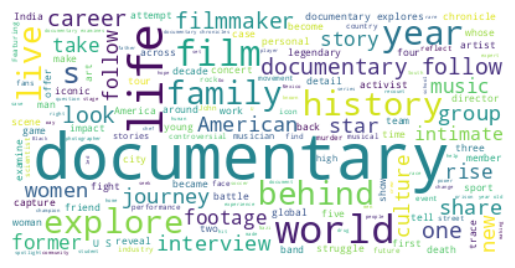

In [118]:
# key content in cluster 4
kmeans_wordcloud(4)

In [119]:
netflix_df[netflix_df['clustering_label']==4].sample(8)[['title','rating','listed_in']]

title        rating  \
3608                                Let There Be Light    Older Kids   
3792                                          LoveTrue        Adults   
2696                Hello, Privilege. It's Me, Chelsea        Adults   
7235                                            Trophy        Adults   
2889                                       I Am Divine        Adults   
2781                                         Holy Hell        Adults   
1182                         Calum von Moger: Unbroken        Adults   
6730  The Other One: The Long Strange Trip of Bob Weir  Young Adults   

                                listed_in  
3608        Classic Movies, Documentaries  
3792                        Documentaries  
2696                        Documentaries  
7235  Documentaries, International Movies  
2889          Documentaries, LGBTQ Movies  
2781                        Documentaries  
1182         Documentaries, Sports Movies  
6730      Documentaries, Music & Musicals

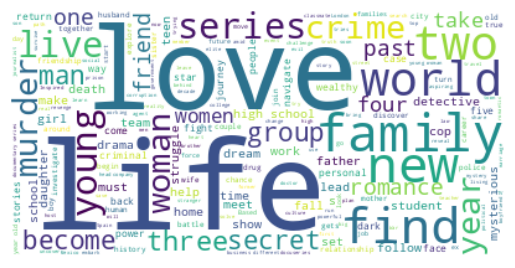

In [120]:
# key content in cluster 5
kmeans_wordcloud(5)

In [121]:
netflix_df[netflix_df['clustering_label']==5].sample(8)[['title','rating','listed_in']]

title        rating  \
4317          My First First Love  Young Adults   
7085                      Tijuana        Adults   
1828                         Dope        Adults   
2682            Heavy Rescue: 401        Adults   
6196                  The Calling        Adults   
2289         Friends from College        Adults   
7637                   Winter Sun        Adults   
4206  Monty Don's Italian Gardens          Kids   

                                              listed_in  
4317  International TV Shows, Korean TV Shows, Roman...  
7085  Crime TV Shows, International TV Shows, Spanis...  
1828                         Crime TV Shows, Docuseries  
2682                 International TV Shows, Reality TV  
6196                 International TV Shows, Reality TV  
2289                     Romantic TV Shows, TV Comedies  
7637    International TV Shows, TV Dramas, TV Thrillers  
4206  British TV Shows, Docuseries, International TV...

### **Hierarchial clustering**

In [122]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [123]:
# plotting dendogram

Z = linkage(X_pca, method='ward')


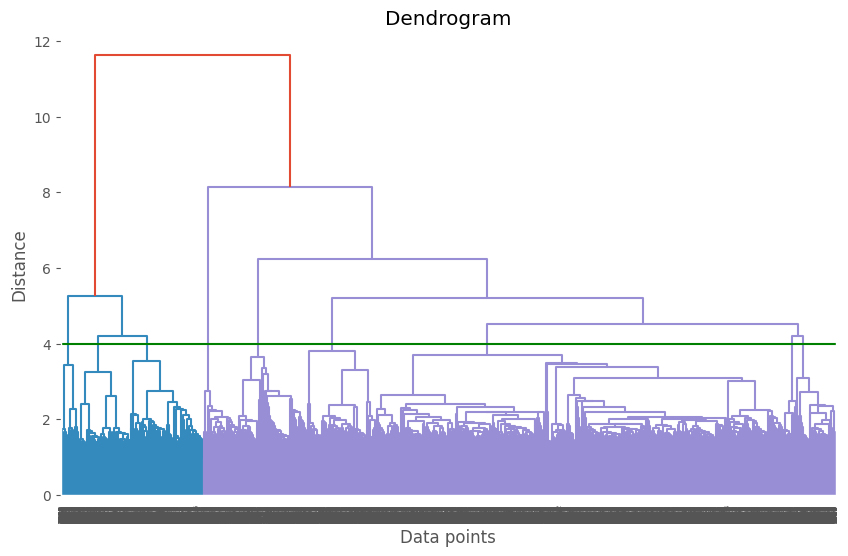

In [124]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.axhline(y=4,color='green')
plt.title('Dendrogram')
plt.show()

number of clusters observed from the dendogram is 9.

In [125]:
# implementing agglomerative clustering
agg_model = AgglomerativeClustering(n_clusters=9, linkage='ward', affinity='euclidean')
agg_model.fit(X_pca)

AgglomerativeClustering(affinity='euclidean', n_clusters=9)

In [126]:
agg_model.labels_
netflix_df['hierc_cluster_label']=agg_model.labels_
netflix_df.sample(5)

show_id     type                            title      director  \
1440   s1441  TV Show                        Cobra Kai                 
5950   s5951    Movie                           Sylvia  DanielOriahi   
6228   s6229    Movie          The Cloverfield Paradox    JuliusOnah   
4879   s4880    Movie                          Platoon   OliverStone   
1389   s1390  TV Show  Cinderella and the Four Knights                 

                                                   cast  \
1440  RalphMacchio, WilliamZabka, XoloMaridueña, Mar...   
5950  ChrisAttoh, ZainabBalogun, IniDima-Okojie, Udo...   
6228  GuguMbatha-Raw, DavidOyelowo, DanielBrühl, Joh...   
4879  TomBerenger, WillemDafoe, CharlieSheen, Forest...   
1389  JungIl-woo, AhnJae-hyeon, ParkSo-dam, LeeJung-...   

                            country date_added  release_year        rating  \
1440                  United States 2021-01-01          2021  Young Adults   
5950                        Nigeria 2020-07-15          2018  Young Adults   
6228                  United States 2018-02-05          2018         Teens   
4879  United States, United Kingdom 2020-11-01          1986        Adults   
1389                    South Korea 2019-12-15          2016    Older Kids   

       duration                                          listed_in  \
1440  3 Seasons                   TV Action & Adventure, TV Dramas   
5950    104 min            Dramas, International Movies, Thrillers   
6228    102 min               Action & Adventure, Sci-Fi & Fantasy   
4879    120 min         Action & Adventure, Classic Movies, Dramas   
1389   1 Season  International TV Shows, Korean TV Shows, Roman...   

                                            description month_added  \
1440  Decades after the tournament that changed thei...     January   
5950  When a man outgrows a childhood friendship and...        July   
6228  Orbiting above a planet on the brink of war, s...    February   
4879  A soldier grows disillusioned as he's caught b...    November   
1389  Catching the eye of a wealthy gentleman, spunk...    December   

      year_added                                      combined_text  \
1440        2021  ralphmacchio williamzabka xolomaridueña martin...   
5950        2020  danieloriahi chrisattoh zainabbalogun inidimao...   
6228        2018  juliusonah gugumbatharaw davidoyelowo danielbr...   
4879        2020  oliverstone tomberenger willemdafoe charlieshe...   
1389        2019  jungilwoo ahnjaehyeon parksodam leejungshin ki...   

      clustering_label  hierc_cluster_label  
1440                 3                    2  
5950                 1                    2  
6228                 3                    2  
4879                 3                    2  
1389                 5                    7

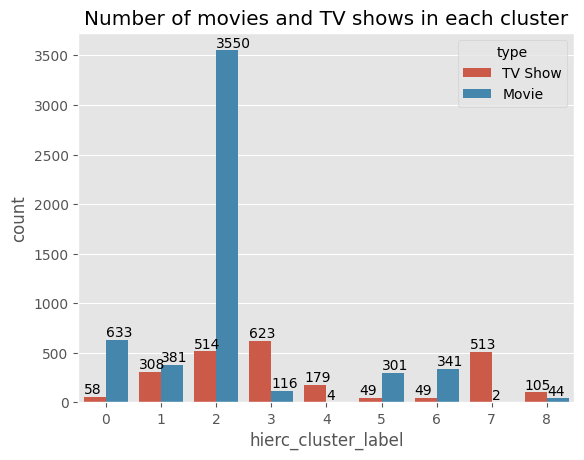

In [127]:
bars=sns.countplot(x='hierc_cluster_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 30, format(yval,'.0f'))

In [128]:
def hierachial_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['hierc_cluster_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


#### **Looking to understand the content present in the clusters**

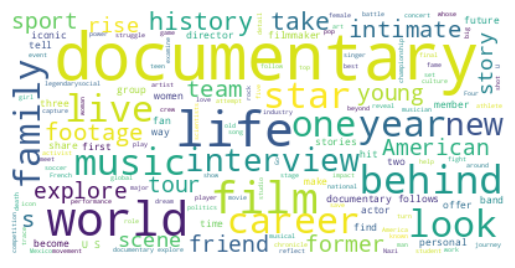

In [129]:
# key content in cluster 0
hierachial_wordcloud(0)

In [130]:
netflix_df[netflix_df['hierc_cluster_label']==0].sample(8)[['title','rating','listed_in']]

title        rating  \
3608         Let There Be Light    Older Kids   
4664              Opening Night        Adults   
5193              Rhythm + Flow        Adults   
2361           Garuda Di Dadaku    Older Kids   
2331  Gabru: Hip Hop Revolution  Young Adults   
2240               Forever Pure        Adults   
1079           Brave Miss World  Young Adults   
1666          Dear White People        Adults   

                                              listed_in  
3608                      Classic Movies, Documentaries  
4664     Comedies, Independent Movies, Music & Musicals  
5193                                         Reality TV  
2361    Children & Family Movies, Dramas, Sports Movies  
2331                  International TV Shows, TV Dramas  
2240  Documentaries, International Movies, Sports Mo...  
1079                         Crime TV Shows, Docuseries  
1666                             TV Comedies, TV Dramas

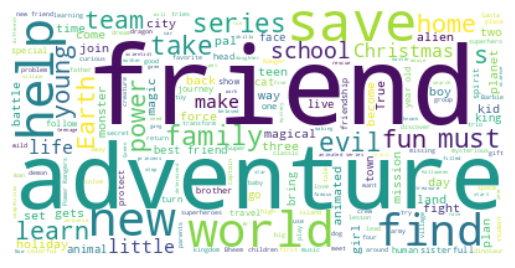

In [131]:
# key content in cluster 1
hierachial_wordcloud(1)

In [132]:
netflix_df[netflix_df['hierc_cluster_label']==1].sample(8)[['title','rating','listed_in']]

title      rating  \
2808                             Horrid Henry  Older Kids   
6758                         The Pirate Fairy        Kids   
2157                               Figaro Pho  Older Kids   
4197    Monster High: Scaris, City of Frights        Kids   
7000                          The Willoughbys  Older Kids   
7715                                     Yoko        Kids   
4991                                 Prospect      Adults   
4085  Mighty Little Bheem: Festival of Colors        Kids   

                                    listed_in  
2808  British TV Shows, Kids' TV, TV Comedies  
6758                 Children & Family Movies  
2157       Children & Family Movies, Comedies  
4197                 Children & Family Movies  
7000       Children & Family Movies, Comedies  
7715                                 Kids' TV  
4991              Sci-Fi & Fantasy, Thrillers  
4085                    Kids' TV, TV Comedies

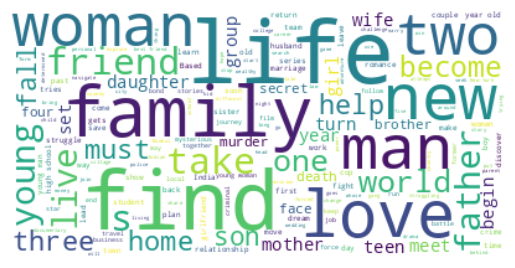

In [133]:
# key content in cluster 2
hierachial_wordcloud(2)

In [134]:
netflix_df[netflix_df['hierc_cluster_label']==2].sample(8)[['title','rating','listed_in']]

title        rating  \
573                        Are We Done Yet?  Young Adults   
4150                       Mission of Honor        Adults   
3371                Kidnapping Mr. Heineken        Adults   
4769                    Paranormal Survivor  Young Adults   
7468                     Walk. Ride. Rodeo.    Older Kids   
1326  Chicken Soup for the Soul's Being Dad        Adults   
7315                         Unacknowledged        Adults   
835                    Benji: Off the Leash    Older Kids   

                                             listed_in  
573             Comedies, Dramas, International Movies  
4150                        Action & Adventure, Dramas  
3371  Action & Adventure, Dramas, International Movies  
4769                                        Docuseries  
7468                  Children & Family Movies, Dramas  
1326                                        Docuseries  
7315                                     Documentaries  
835                   Children & Family Movies, Dramas

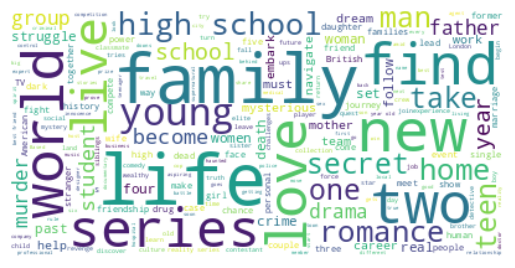

In [135]:
# key content in cluster 3
hierachial_wordcloud(3)

In [136]:
netflix_df[netflix_df['hierc_cluster_label']==3].sample(8)[['title','rating','listed_in']]

title        rating  \
384                        Ali & Alia  Young Adults   
3941                         Marianne        Adults   
6210                        The Chase    Older Kids   
6987                      The Warning        Adults   
1549                           Cuckoo        Adults   
4497                            Nobel        Adults   
1106  Bring It On: Worldwide Showdown         Teens   
5286              Roswell, New Mexico  Young Adults   

                                              listed_in  
384       Dramas, International Movies, Romantic Movies  
3941       International TV Shows, TV Dramas, TV Horror  
6210                                         Reality TV  
6987                    International Movies, Thrillers  
1549  British TV Shows, International TV Shows, TV C...  
4497    International TV Shows, TV Dramas, TV Thrillers  
1106                                           Comedies  
5286  Classic & Cult TV, TV Dramas, TV Sci-Fi & Fantasy

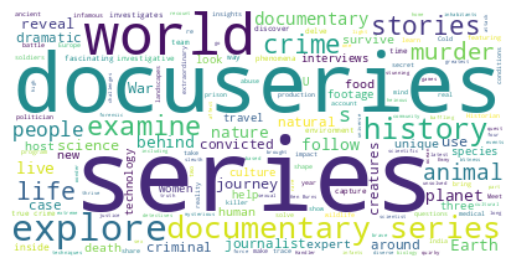

In [137]:
# key content in cluster 4
hierachial_wordcloud(4)

In [138]:
netflix_df[netflix_df['hierc_cluster_label']==4].sample(8)[['title','rating','listed_in']]

title        rating  \
7617                        Wild Alaska    Older Kids   
6124  The Beginning of Life: The Series    Older Kids   
3334           Ken Burns: The Civil War  Young Adults   
7672                           Wormwood  Young Adults   
6494                   The Innocent Man        Adults   
1773                        Dirty Money        Adults   
2057          Examination of Conscience        Adults   
4466                     Night on Earth    Older Kids   

                                              listed_in  
7617  British TV Shows, Docuseries, Science & Nature TV  
6124  Docuseries, International TV Shows, Science & ...  
3334                                         Docuseries  
7672                         Crime TV Shows, Docuseries  
6494                         Crime TV Shows, Docuseries  
1773                         Crime TV Shows, Docuseries  
2057  Crime TV Shows, Docuseries, International TV S...  
4466                    Docuseries, Science & Nature TV

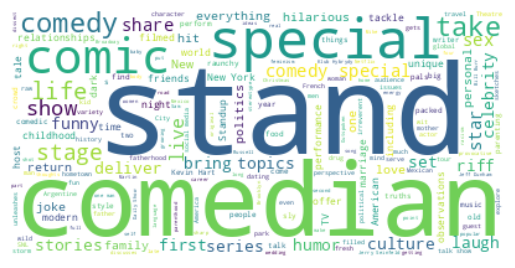

In [139]:
# key content in cluster 5
hierachial_wordcloud(5)

In [140]:
netflix_df[netflix_df['hierc_cluster_label']==5].sample(8)[['title','rating','listed_in']]

title        rating  \
3141  Jeff Foxworthy and Larry the Cable Guy: We’ve ...  Young Adults   
7079  Tiffany Haddish: She Ready! From the Hood To H...        Adults   
307                             ADAM SANDLER 100% FRESH        Adults   
1071                        Brad Paisley's Comedy Rodeo        Adults   
4070                          Michael McIntyre: Showman        Adults   
5272     Ronny Chieng: Asian Comedian Destroys America!        Adults   
5356                          Sam Jay: 3 In The Morning        Adults   
1630   Dave Chappelle: Equanimity & The Bird Revelation        Adults   

                                      listed_in  
3141                            Stand-Up Comedy  
7079                            Stand-Up Comedy  
307                             Stand-Up Comedy  
1071                            Stand-Up Comedy  
4070                            Stand-Up Comedy  
5272                            Stand-Up Comedy  
5356                            Stand-Up Comedy  
1630  Stand-Up Comedy & Talk Shows, TV Comedies

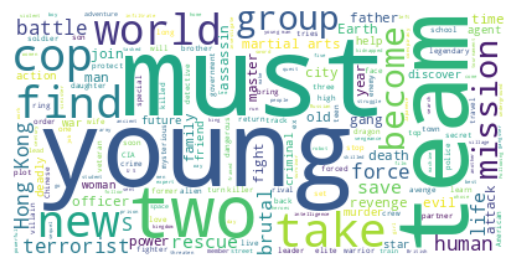

In [141]:
# key content in cluster 6
hierachial_wordcloud(6)

In [142]:
netflix_df[netflix_df['hierc_cluster_label']==6].sample(8)[['title','rating','listed_in']]

title      rating  \
1816  Don't Go Breaking My Heart  Older Kids   
3                              9       Teens   
2453                  God of War      Adults   
7529     Welcome to Sudden Death      Adults   
7186               Transcendence       Teens   
5647                  Skin Trade      Adults   
1135               Bulletproof 2      Adults   
2457                     Godless      Adults   

                                              listed_in  
1816    Comedies, International Movies, Romantic Movies  
3     Action & Adventure, Independent Movies, Sci-Fi...  
2453           Action & Adventure, International Movies  
7529                                 Action & Adventure  
7186                        Sci-Fi & Fantasy, Thrillers  
5647                                 Action & Adventure  
1135                       Action & Adventure, Comedies  
2457                                          TV Dramas

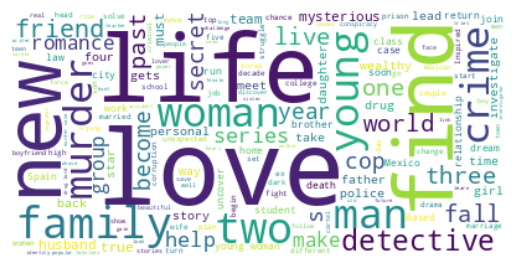

In [143]:
# key content in cluster 7
hierachial_wordcloud(7)

In [144]:
netflix_df[netflix_df['hierc_cluster_label']==7].sample(8)[['title','rating','listed_in']]

title        rating  \
539             Anne with an E    Older Kids   
1951                   El Clon  Young Adults   
2376   Gentlemen and Gangsters        Adults   
5175               Retribution        Adults   
989                 Blood Pact        Adults   
7583  When the Camellia Blooms  Young Adults   
6273    The Day I Met El Chapo        Adults   
3621                      Life        Adults   

                                              listed_in  
539    International TV Shows, TV Dramas, Teen TV Shows  
1951  Romantic TV Shows, Spanish-Language TV Shows, ...  
2376  Crime TV Shows, International TV Shows, Romant...  
5175  British TV Shows, Crime TV Shows, Internationa...  
989   Crime TV Shows, International TV Shows, TV Dramas  
7583  International TV Shows, Korean TV Shows, Roman...  
6273  Crime TV Shows, Docuseries, International TV S...  
3621  International TV Shows, Korean TV Shows, TV Dr...

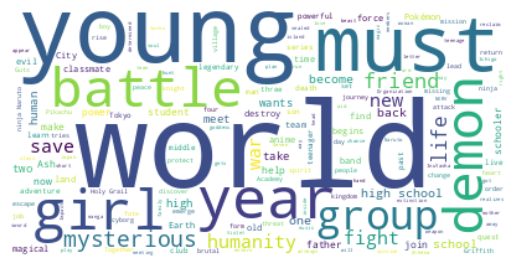

In [145]:
# key content in cluster 8
hierachial_wordcloud(8)

In [146]:
netflix_df[netflix_df['hierc_cluster_label']==8].sample(8)[['title','rating','listed_in']]

title        rating  \
3040  InuYasha: The Movie 2: The Castle Beyond the L...  Young Adults   
1875                                   DRIFTING DRAGONS  Young Adults   
843   Berserk: The Golden Age Arc I - The Egg of the...        Adults   
4488                              No Game No Life: Zero        Adults   
3852                          Magi: Adventure of Sinbad  Young Adults   
3263                                              K-On!    Older Kids   
1848                                     Dragon's Dogma        Adults   
3932                         March Comes in Like a Lion  Young Adults   

                                              listed_in  
3040  Action & Adventure, Anime Features, Internatio...  
1875               Anime Series, International TV Shows  
843   Action & Adventure, Anime Features, Internatio...  
4488  Action & Adventure, Anime Features, Sci-Fi & F...  
3852               Anime Series, International TV Shows  
3263                        Anime Series, Teen TV Shows  
1848               Anime Series, International TV Shows  
3932  Anime Series, International TV Shows, Teen TV ...

### **Recommendation system**

Here we use Content based filltering to reccomend top movies.

In [354]:
recommender_df=netflix_df.copy()

In [355]:
recommender_df['combined_text']

0       joãomiguel biancacomparato michelgomes rodolfo...
1       jorgemichelgrau demiánbichir héctorbonilla osc...
2       gilbertchan teddchan stellachung henleyhii law...
3       shaneacker elijahwood johncreilly jenniferconn...
4       robertluketic jimsturgess kevinspacey katebosw...
                              ...                        
7782    joseffares imadcreidi antoinetteturk eliasgerg...
7783    mozezsingh vickykaushal sarahjanedias raaghavc...
7784    nastyc adults documentaries international movi...
7785    adrianozumbo rachelkhoo older kid internationa...
7786    samdunn adults documentaries music musicals do...
Name: combined_text, Length: 7770, dtype: object

In [356]:
recommender_df.shape

(7770, 17)

In [357]:
recommender_df=recommender_df[['title','combined_text']]
recommender_df.head()

title                                      combined_text
0     3%  joãomiguel biancacomparato michelgomes rodolfo...
1   7:19  jorgemichelgrau demiánbichir héctorbonilla osc...
2  23:59  gilbertchan teddchan stellachung henleyhii law...
3      9  shaneacker elijahwood johncreilly jenniferconn...
4     21  robertluketic jimsturgess kevinspacey katebosw...

In [358]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer()
X_cv=count_vectorizer.fit_transform(recommender_df['combined_text'])

In [359]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(X_pca)
print(cosine_sim)

[[ 1.00000000e+00 -2.02620208e-02  4.16812593e-02 ... -2.65680852e-02
   3.12928777e-02 -2.68525007e-02]
 [-2.02620208e-02  1.00000000e+00  1.25198540e-03 ...  5.09074310e-02
  -2.33922522e-02 -7.36697054e-03]
 [ 4.16812593e-02  1.25198540e-03  1.00000000e+00 ...  1.57588276e-04
   1.08114201e-03 -1.10721199e-02]
 ...
 [-2.65680852e-02  5.09074310e-02  1.57588276e-04 ...  1.00000000e+00
  -2.04143843e-02  2.28408537e-01]
 [ 3.12928777e-02 -2.33922522e-02  1.08114201e-03 ... -2.04143843e-02
   1.00000000e+00  3.81670962e-02]
 [-2.68525007e-02 -7.36697054e-03 -1.10721199e-02 ...  2.28408537e-01
   3.81670962e-02  1.00000000e+00]]


In [360]:
cosine_sim.shape

(7770, 7770)

In [361]:
recommender_df.reset_index(inplace=True)

In [362]:
def recommend_movies(movie):
  try:
    index=recommender_df.loc[recommender_df['title'].str.lower()== movie.lower()].index[0]
    similar_movies=cosine_sim[index]
    similar_movies_ind=np.argsort(similar_movies)[::-1]
    similar_movies_index=similar_movies_ind[1:11]
    recommended_movies=recommender_df.loc[similar_movies_index,'title']
    print(f'If you liked {movie} you may like :')
    print()
    for movies in recommended_movies:
      print(movies)
  except:
    print('invalid entry')


In [363]:
recommend_movies('Narcos')

If you liked Narcos you may like :

Narcos: Mexico
The Great Heist
Wild District
El Cartel
El Chapo
Enemigo íntimo
Apaches
Miss Dynamite
El señor de los Cielos
El Cartel 2


In [364]:
recommend_movies('The Vampire Diaries')

If you liked The Vampire Diaries you may like :

Transfers
The Originals
The Roommate
Switched
Vampires
Warrior Nun
The Little Vampire
Immortals
Scissor Seven
Skin Wars


In [365]:
recommend_movies("Breaking Bad")

If you liked Breaking Bad you may like :

Better Call Saul
Have You Ever Fallen in Love, Miss Jiang?
The Show
Extracurricular
The Mess You Leave Behind
Marvel's The Punisher
The Lies Within
The Underclass
Ex-Boyfriend
Iron Ladies


In [366]:
recommend_movies('Bad Boys')

If you liked Bad Boys you may like :

Bad Boys II
Dollar
Operation Odessa
Merantau
Slow West
A Thin Line Between Love & Hate
Kung Fu Yoga
Mile 22
War on Everyone
Santana


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***